# Bengaluru Real Estate Prediction

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= 'https://raw.githubusercontent.com/FahadUrRehman07/Real_Estate_Price_Prediction/main/Capture.PNG')

## **Bengaluru Indi**a

Bangalore, also called Bengaluru, is the capital of Karnataka. The city is also known as the "Garden City" and the "Silicon Valley of India".
The city of Bangalore is situated in the southeastern part of the state in the center of the Mysore Plateau at an average elevation of 2953 ft. 

The city of Bangalore is the 3rd most populated city in India and has a population of 8,425,970. The city of Bangalore is well known for its Information Technology sector. It has many tourists' places, facilities and plenty of sightseeing locations. As a growing metropolitan city, Bangalore is rapidly becoming a major financial and cultural hub. Bangalore is ranked as the best city to live among all the five metro cities of India. The quality of life and climate in Bangalore, both are much better than the rest of the Indian metropolitan cities.

Real Estate of Bengaluru
---

For more than a decade many Information Technology enabled Services (I.T.E.S) and Business Process Outsourcing (BPO) companies have established their offices in Bangalore. This has formed an active demand for commercial and residential properties in Bangalore. In the commercial segment, office spaces are in demand and the retail segment is also strong. The Residential segment, developers are building unique properties to attract consumer. The Real Estate in Bangalore is also witnessing new trends and is expanding to new centers. Thus, offering lots of opportunities in the real estate sector.

Introduction/Description
---

What are the things that a potential home buyer considers before purchasing a house? 
Potential home buyers consider factors such as location, property size, proximity to essential 
amenities (offices, schools, parks, restaurants, hospitals), and most importantly, the price when 
purchasing a house., 

To address this, the Bengaluru_House_Data dataset contains details of residential properties in Bengaluru, India. It includes attributes like the area_type, location,availability, size, society, total_sqft, bath, balcony and price across different localities in the city. This comprehensive housing data provides valuable insights into the Bengaluru real estate market. We will delve into the data to extract insights, perform exploratory data analysis (EDA), and draw meaningful conclusions and train our model to predict prices.

🔴Import Libraries 📦
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [3]:
data = pd.read_csv('bengaluru_house_prices.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


📌 Area_type - Description of the area

📌 Availability - When it can be possessed or when it is ready

📌 Location - Where it is located in Bengaluru

📌 Size - BHK or Bedrooms

📌 Society - To which society it belongs

📌 Total_sqft - Size of the property in sq.ft

📌 Bath - No. of Bathrooms

📌 Balcony - No. of the Balcony

📌 Price - Value of the property in lakhs (Indian Rupee - ₹)

Understanding the dataset 🕵️‍♀️
---

In [4]:
data.shape

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


**Remove Duplicates where they might be present**

In [7]:
data.drop_duplicates()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


**Which features contain blank, null or empty values?**

In [8]:
null = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count()) * 100).sort_values(ascending=False)
missing_val = pd.concat([null, percent], axis=1, keys=['total', 'percent'])
missing_val

,total,percent
society,5502,41.306306
balcony,609,4.572072
bath,73,0.548048
size,16,0.120120
location,1,0.007508
area_type,0,0.000000
availability,0,0.000000
total_sqft,0,0.000000
price,0,0.000000


<Axes: >

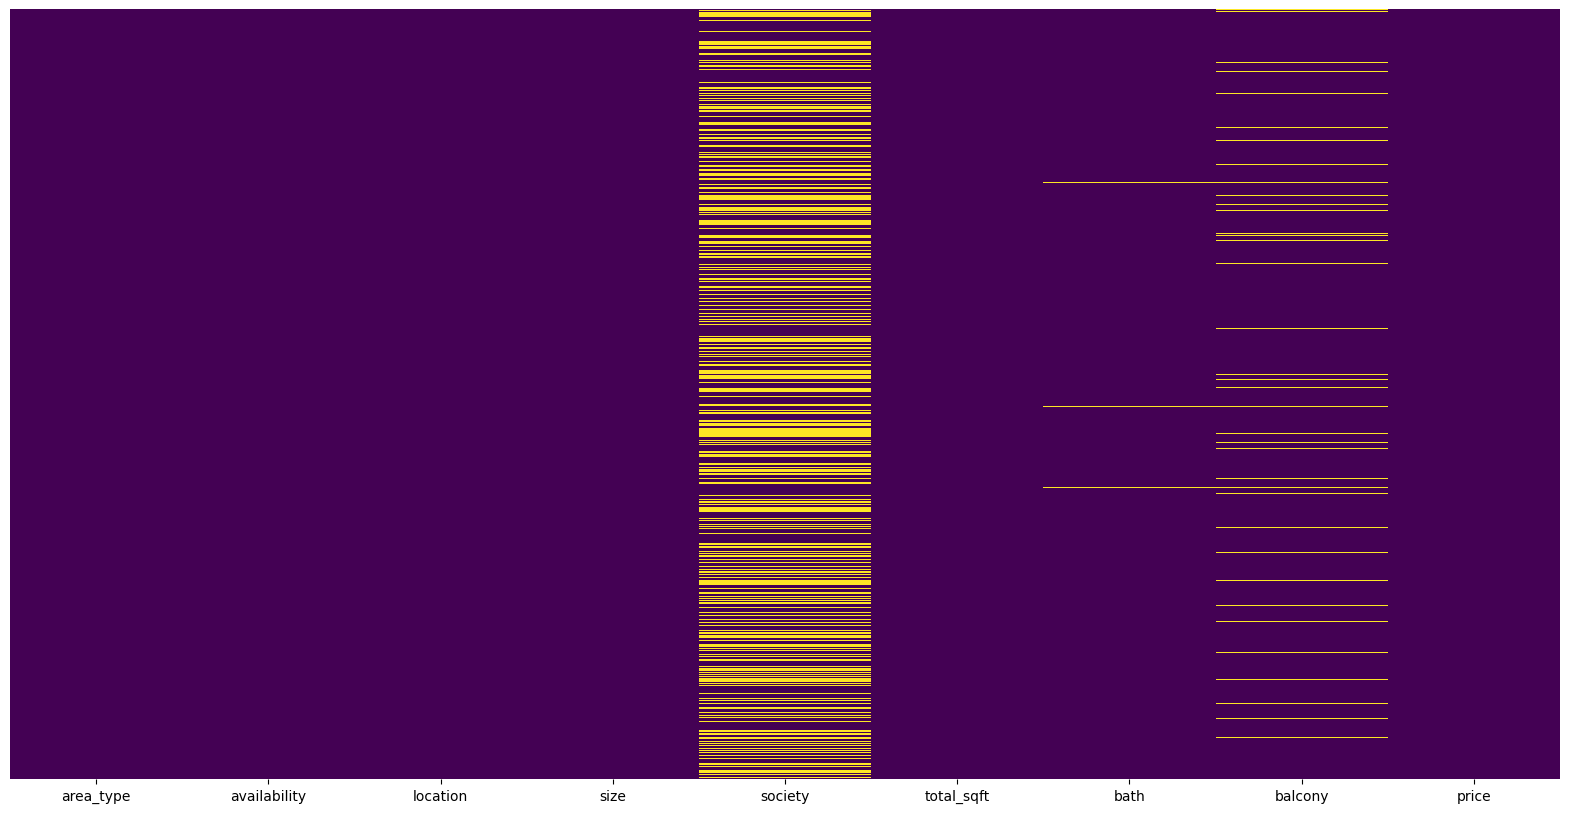

In [9]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

**Remove the society atrribute which contains a lot of null values**

In [10]:
data.drop(['society'], axis=1, inplace=True)

Data Cleaning/ Exploratory Data Analysis 🧪
---

**Lets focus on the size attribute** 

In [11]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

removing the null values present is preferrable to median imputaion
because in this case the values are strings

In [12]:
data = data.dropna(subset='size')

create a new column with only the numeric value of the size attribute

In [13]:
data['bhk'] = data['size'].apply(lambda x: int(x.split()[0]))
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
data.drop(['size'], axis=1, inplace=True)

**lets check the distribution of the numeric attributes**

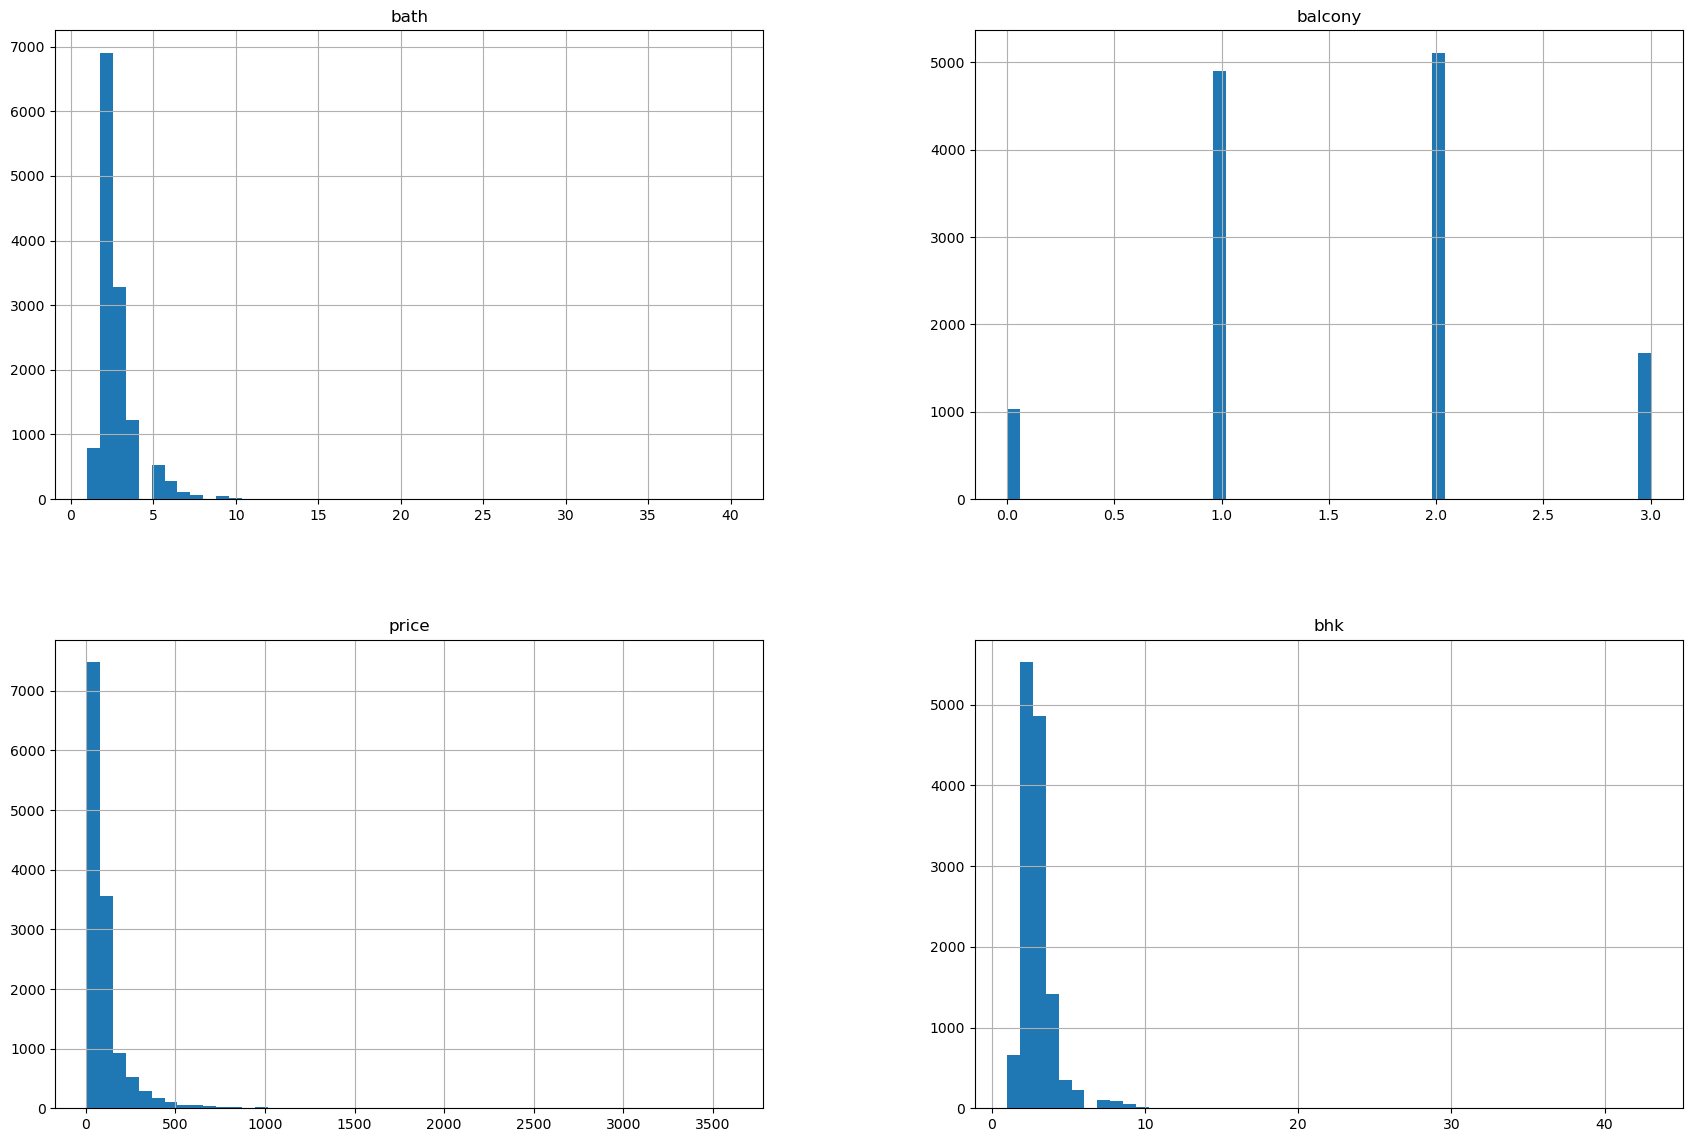

In [15]:
data.hist(bins=50,figsize=(21,14))
plt.show()

**seems the total_sqft attribute is missing, lets investigate it**

In [16]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
data[~data["total_sqft"].apply(is_float)].head(10)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,NaN,NaN,224.500,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,1520 - 1740,NaN,NaN,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


From the above we can see that total_sqft can be a range (say, 2100-2850). For such cases we can just take average of the minimum and maximum value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. So, we are going to just drop such corner cases to keep things simple.¶
Converting Sq.Ft to Number

In [19]:
def convert_sqft_to_number(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
data = data.copy()
data["total_sqft"] = data["total_sqft"].apply(convert_sqft_to_number)
data

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,NaN,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


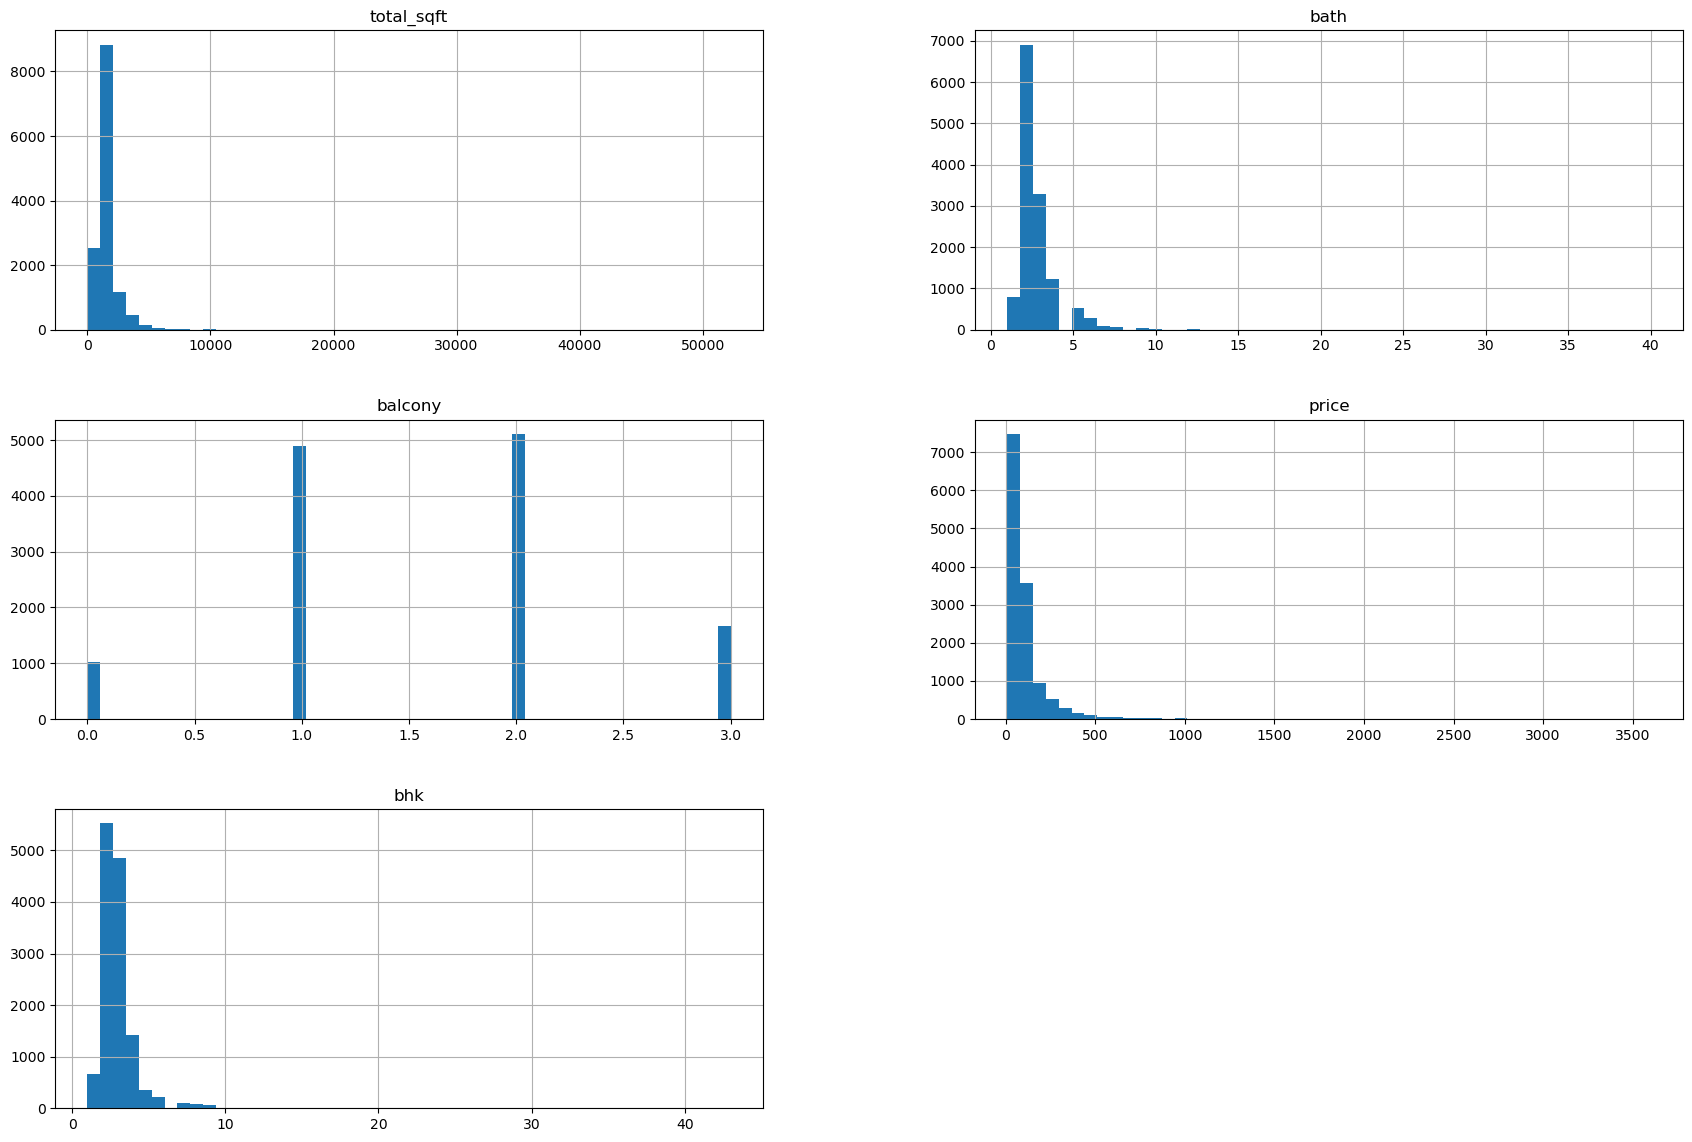

In [21]:
data.hist(bins=50,figsize=(21,14))
plt.show()

**Because of the tranformation of total_sqft it will turn some invalid values to NaN**
 

In [22]:
data.isnull().sum() 

area_type         0
availability      0
location          1
total_sqft       46
bath             57
balcony         593
price             0
bhk               0
dtype: int64

**I can introduce median imputation to bath and total_sqft since the distributon is skewed**

In [23]:
data['bath'] = data['bath'].fillna(value=data['bath'].median())
data['total_sqft'] = data['total_sqft'].fillna(value=data['total_sqft'].median())

**Checking what different "Area Types" are present in the Dataset**

In [24]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2009
Carpet  Area              87
Name: count, dtype: int64

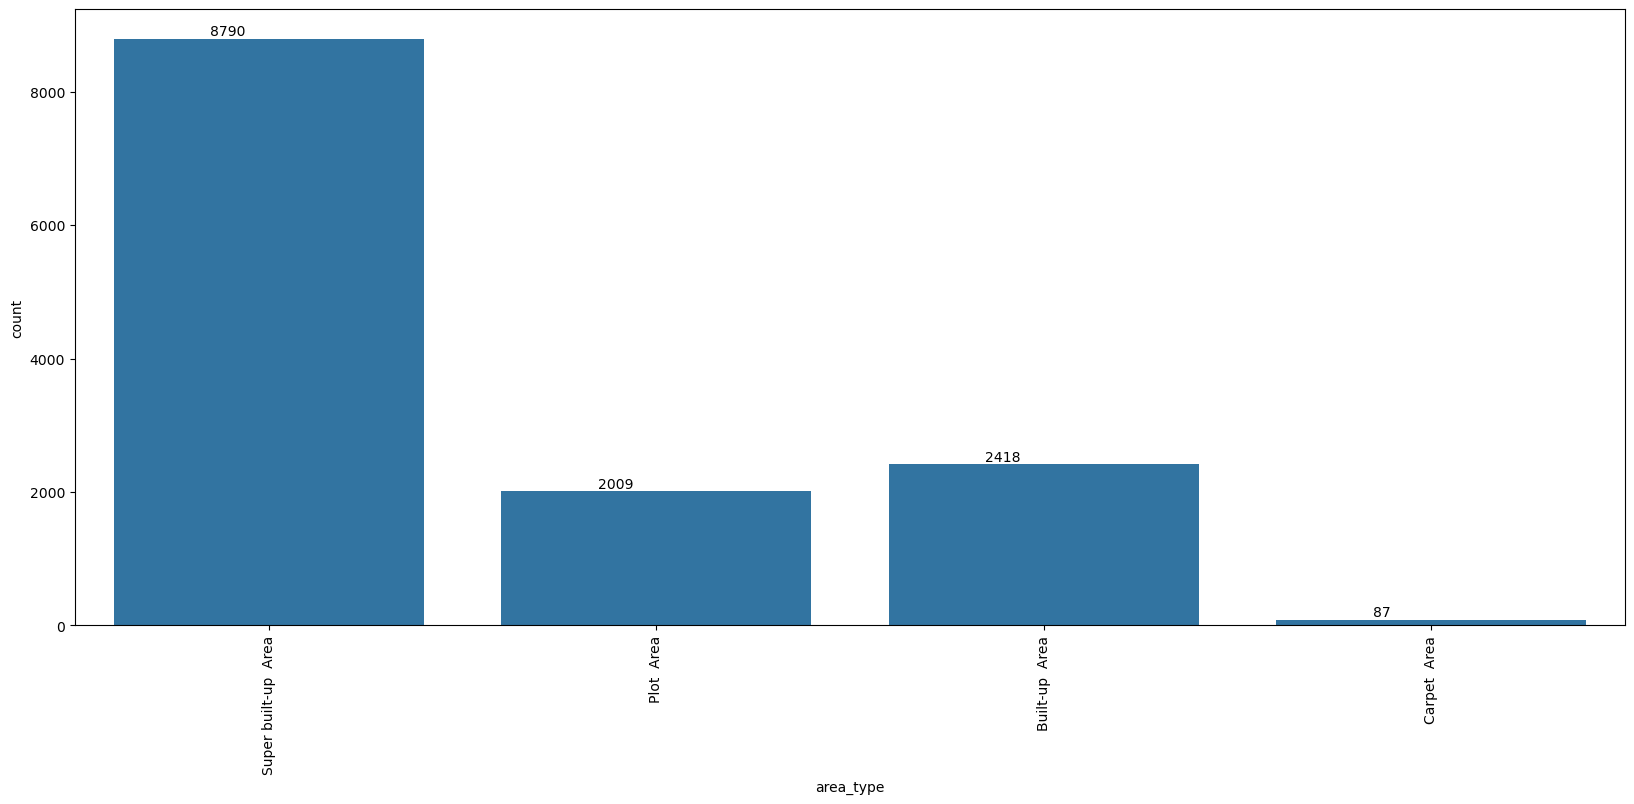

In [25]:
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'area_type', data = data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

**Dropping less important features**

In [26]:
data.drop(['area_type', 'availability'], axis = 1, inplace=True)
data.head(10)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
5,Whitefield,1170.0,2.0,1.0,38.00,2
6,Old Airport Road,2732.0,4.0,NaN,204.00,4
7,Rajaji Nagar,3300.0,4.0,NaN,600.00,4
8,Marathahalli,1310.0,3.0,1.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,NaN,370.00,6


In [27]:
data.dropna(inplace=True)

In [28]:
data.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

Feature Engineering and Dimensional Reduction ⛩️
---

**Price per Square Foot (price_per_sqft)**

In [29]:
data['price_per_sqft']  = data['price']*100000/data['total_sqft']
data.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


Multiply price by 100000 since the price is in lakhs

**Bathroom to BHK Ratio (bath_per_bhk)**

In [30]:
data['bath_per_bhk'] = data['bath'] / data['bhk']
data.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,bath_per_bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,1.000000
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615,1.250000
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,0.666667
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,1.000000
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,1.000000


This helps indicate the proportionality of bathrooms to bedrooms, which might be an important factor in property evaluations.

**Size Category**

In [31]:
def categorize_size(sqft):
    if sqft < 1000:
        return 'Small'
    elif sqft <= 2000:
        return 'Medium'
    else:
        return 'Large'
data['size_category'] = data['total_sqft'].apply(categorize_size)


Categorical feature based on property size (total_sqft):

Small: Less than 1000 sqft

Medium: Between 1000 and 2000 sqft

Large: Greater than 2000 sqft

**Total Bathrooms and Bedrooms (rooms_total)**

In [32]:
data['rooms_total'] = data['bhk'] + data['bath']

Combining bhk and bath into a single feature might capture overall space usage.

**Dimensionality Reduction on the location attribute**

In [33]:
len(data['location'].unique())

1265

the unique number of location is too high and its dimentional problem¶

In [34]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_stat = data['location'].value_counts(ascending=False)
location_stat

location
Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: count, Length: 1254, dtype: int64

In [35]:
len(location_stat[location_stat<=10])

1017

In [36]:
location_stats_less_than_10 = location_stat[location_stat<=10]
data['location'] = data['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data['location'].unique())

238

Here, I applied Dimentionality Reduction for the data which are categorical variable.Dimensionality Reduction here is needed to reduce number of locations.

In [37]:
data.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,bath_per_bhk,size_category,rooms_total
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,1.000000,Medium,4.0
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615,1.250000,Large,9.0
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,0.666667,Medium,5.0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,1.000000,Medium,6.0
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,1.000000,Medium,4.0
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248,1.000000,Medium,4.0
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275,1.000000,Medium,6.0
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.888889,0.666667,Medium,5.0
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605,1.250000,Large,9.0
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,3800.000000,1.000000,Medium,4.0


In [38]:
data.shape

(12710, 10)

Handling Outliers 🎡
---

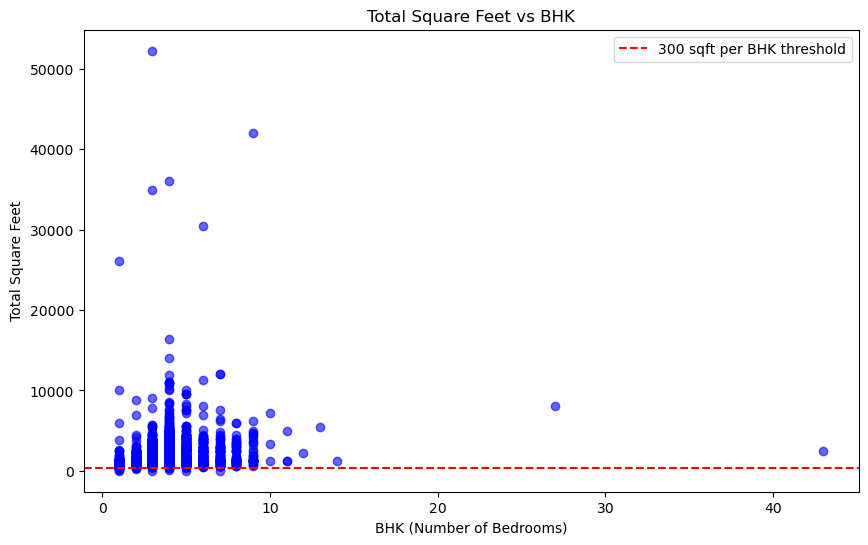

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(data['bhk'], data['total_sqft'], alpha=0.6, color='blue')
plt.axhline(y=300, color='red', linestyle='--', label='300 sqft per BHK threshold')
plt.xlabel('BHK (Number of Bedrooms)')
plt.ylabel('Total Square Feet')
plt.title('Total Square Feet vs BHK')
plt.legend()
plt.show()


In real-world data, sometimes we encounter outliers—data points that don't make sense or don't fit the usual pattern. Here, we're focusing on properties where the square feet per bedroom (BHK) is less than 300. These are likely errors or unrealistic listings.

Think about it: a bedroom in a property typically needs at least 300 square feet to be livable. For example:

A 2 BHK (2-bedroom property) should ideally have at least 600 sqft.

A property with 400 sqft and 2 BHK seems too small to be realistic.

In [40]:
data[data.total_sqft/data.bhk < 300].head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,bath_per_bhk,size_category,rooms_total
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810,0.666667,Medium,10.0
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296,0.875000,Medium,15.0
70,other,500.0,3.0,2.0,100.0,3,20000.000000,1.000000,Small,6.0
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696,0.500000,Small,3.0
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268,1.000000,Small,12.0


In [41]:
data = data[~(data.total_sqft/data.bhk < 300)]

**When working with data, especially in real estate or business, you want to understand the typical price and exclude extreme cases that don't represent most of the data. This makes analysis more accurate and prevents one or two unusual properties from distorting the results.**

In [42]:
def remove_outliers_based_on_location(data):
    # Initialize an empty DataFrame to store the cleaned data
    cleaned_df = pd.DataFrame()
    
    # Iterate through each location group
    for location, group in data.groupby('location'):
        # Calculate the mean and standard deviation of price per sqft for this location
        mean_price = group['price_per_sqft'].mean()
        std_dev = group['price_per_sqft'].std()
        # Keep only rows where the price per sqft is within 1 standard deviation of the mean
        filtered_group = group[(group['price_per_sqft'] >= (mean_price - std_dev)) & 
                               (group['price_per_sqft'] <= (mean_price + std_dev))]
        # Append the filtered group to the cleaned data
        cleaned_df = pd.concat([cleaned_df, filtered_group], ignore_index=True)
    
    return cleaned_df

# Apply the function to the dataset
data = remove_outliers_based_on_location(data)
print(data.shape)


(9938, 10)


The purpose of the code is to remove outliers based on the price_per_sqft for each location. This method ensures that properties that are priced very differently compared to others in the same location are excluded from the dataset.

Deep Investigations into Outlier possibilities
---

The goal is to analyze how the price relates to the size of the property (i.e., how the total square footage affects the price) for different types of properties, namely 2 BHK and 3 BHK apartments. I want to visually explore this and identify any outliers—properties where the price seems unreasonably high or low compared to the rest of the properties with similar characteristics.

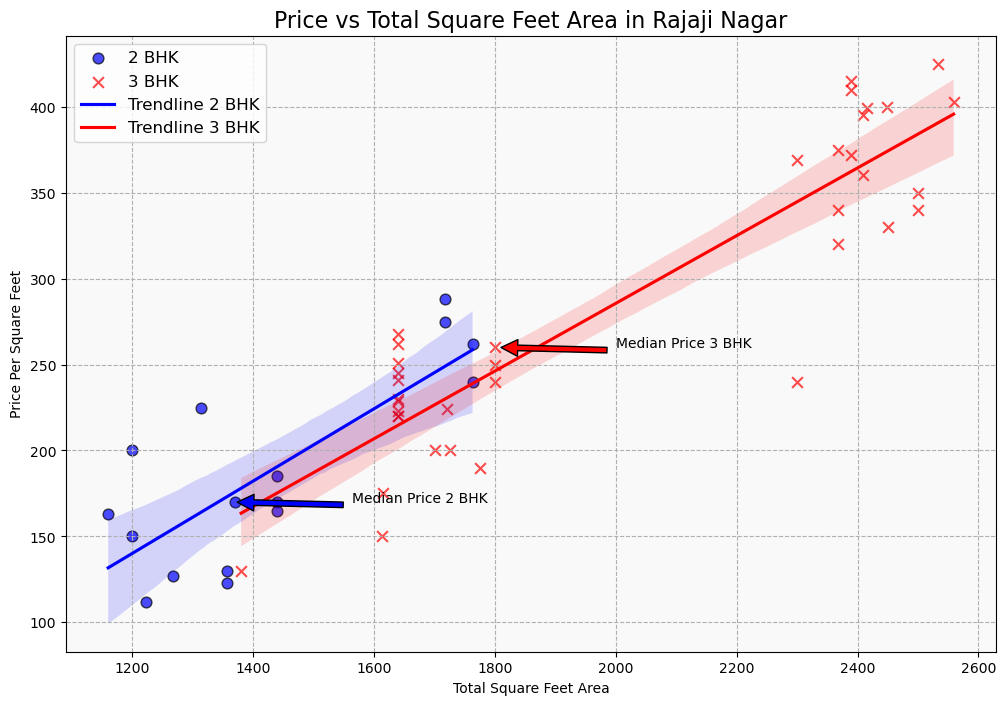

In [43]:
def plot_scatter_chart1(data, location):
    bhk2 = data[(data.location==location) & (data.bhk == 2)]
    bhk3 = data[(data.location==location) & (data.bhk == 3)]
    plt.figure(figsize=(12, 8))  # Adjust figure size 
    # Scatter plot for 2 BHK
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=60, alpha=0.7, edgecolors='k') 
    # Scatter plot for 3 BHK with different marker style
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='x', color='red', label='3 BHK', s=60, alpha=0.7, edgecolors='k') 
    # Add trend lines
    sns.regplot(x=bhk2.total_sqft, y=bhk2.price, scatter=False, color='blue', label='Trendline 2 BHK')
    sns.regplot(x=bhk3.total_sqft, y=bhk3.price, scatter=False, color='red', label='Trendline 3 BHK')
    
    # Annotate median prices
    plt.annotate('Median Price 2 BHK', xy=(bhk2.total_sqft.median(), bhk2.price.median()), xytext=(bhk2.total_sqft.median()+200, bhk2.price.median()),
                 arrowprops=dict(facecolor='blue', shrink=0.05))
    plt.annotate('Median Price 3 BHK', xy=(bhk3.total_sqft.median(), bhk3.price.median()), xytext=(bhk3.total_sqft.median()+200, bhk3.price.median()),
                 arrowprops=dict(facecolor='red', shrink=0.05))
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Price vs Total Square Feet Area in {}'.format(location), fontsize=16)  # Custom title font size
    plt.legend(fontsize=12)  # Custom legend font size
    plt.grid(True, linestyle='--')  # Add gridlines with dashed style
    plt.gca().set_facecolor('#f9f9f9')  # Change background color
    
    plt.show()

plot_scatter_chart1(data, 'Rajaji Nagar')

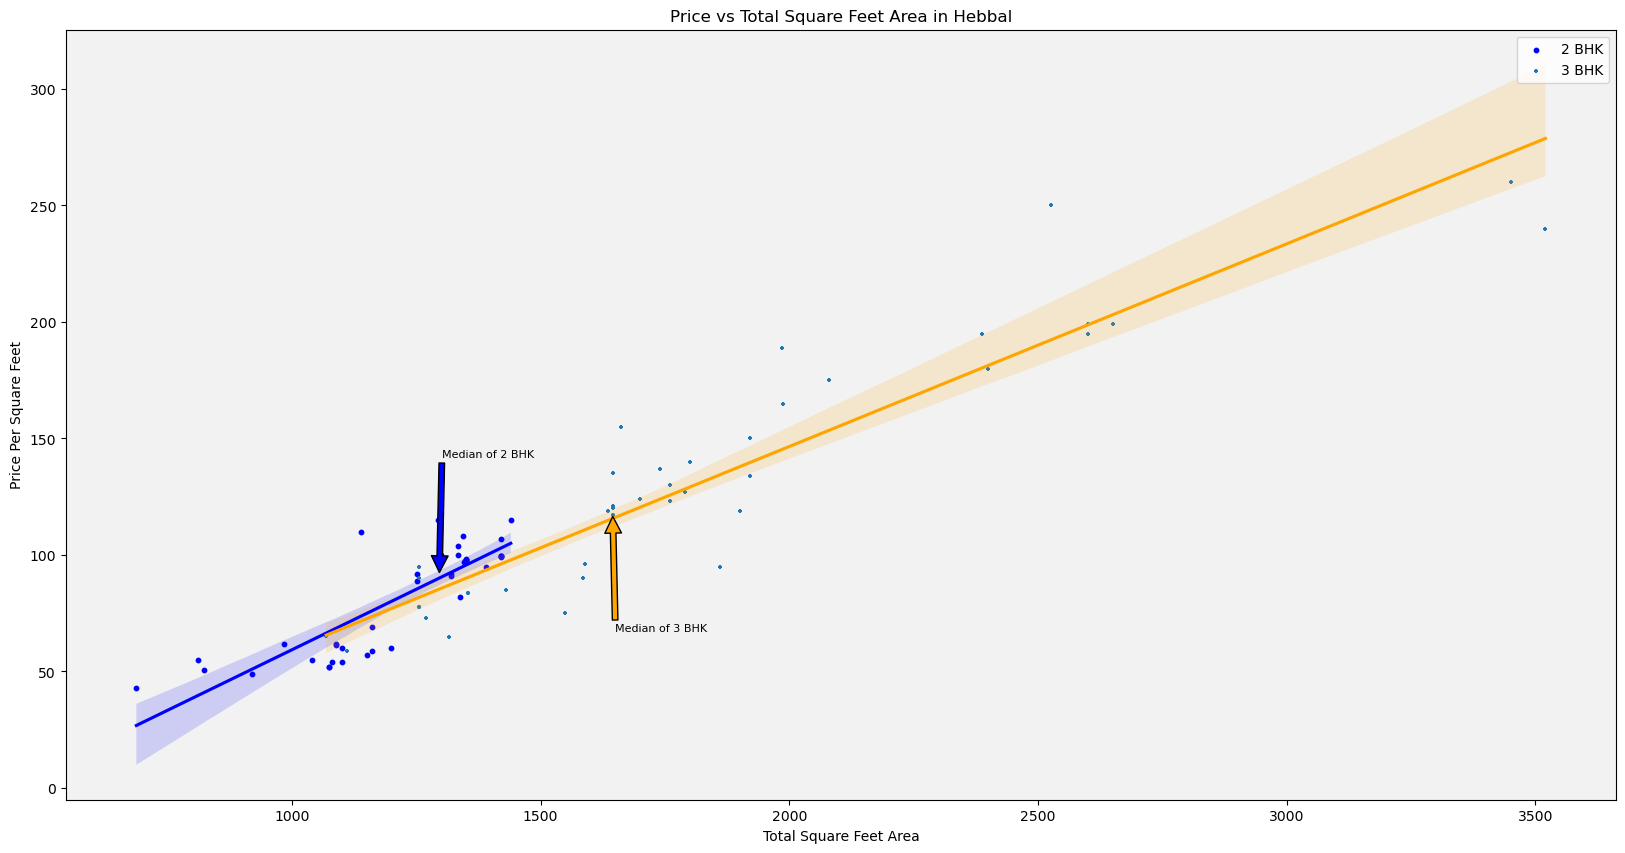

<Figure size 2000x1000 with 0 Axes>

In [44]:
def plot_scatter_chart2(data, location, sample_size=1000):
    bhk2 = data[(data.location==location) & (data.bhk == 2)]
    bhk3 = data[(data.location==location) & (data.bhk == 3)]   
    # Filter out extreme outliers especially the top 1% of prices
    bhk2_filtered = bhk2[bhk2.price <= np.percentile(bhk2.price, 99)] 
    bhk3_filtered = bhk3[bhk3.price <= np.percentile(bhk3.price, 99)]  
    # Sample data to reduce the number of data points
    bhk2_sample = bhk2_filtered.sample(n=min(sample_size, len(bhk2_filtered)))  
    bhk3_sample = bhk3_filtered.sample(n=min(sample_size, len(bhk3_filtered))) 
    plt.figure(figsize=(20, 10))   
    # Scatter plots for 2 BHK and 3 BHK with reduced marker size
    plt.scatter(bhk2_sample.total_sqft, bhk2_sample.price, color='blue', label='2 BHK', s=10) 
    plt.scatter(bhk3_sample.total_sqft, bhk3_sample.price, marker='+', label='3 BHK', s=10)  
    sns.regplot(x=bhk2_sample.total_sqft, y=bhk2_sample.price, scatter=False, color='blue')
    sns.regplot(x=bhk3_sample.total_sqft, y=bhk3_sample.price, scatter=False, color='orange')
    # Annotations for median prices with reduced font size
    plt.annotate('Median of 2 BHK', xy=(np.median(bhk2_sample.total_sqft), np.median(bhk2_sample.price)),
                 xytext=(np.median(bhk2_sample.total_sqft)+5, np.median(bhk2_sample.price)+50),
                 arrowprops=dict(facecolor='blue', shrink=0.01), fontsize=8)  # Reduced font size
    plt.annotate('Median of 3 BHK', xy=(np.median(bhk3_sample.total_sqft), np.median(bhk3_sample.price)),
                 xytext=(np.median(bhk3_sample.total_sqft)+5, np.median(bhk3_sample.price)-50),
                 arrowprops=dict(facecolor='orange', shrink=0.01), fontsize=8)  # Reduced font size
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Price vs Total Square Feet Area in {}'.format(location))
    plt.legend()
    plt.grid(False)
    plt.gca().set_facecolor('#f2f2f2')  # Set background color
    plt.show()
    plt.savefig('plot1.png')
plot_scatter_chart2(data, 'Hebbal', sample_size=1000)

After generating the scatter plot, its observed that there are some outliers in the data where:

For some square footage areas, a 2 BHK apartment has a higher price than a 3 BHK apartment. This is likely due to factors such as location, property condition, or other features that aren't captured in the dataset.

properties where the price of a 3 BHK apartment is lower than a 2 BHK apartment should be removed, given that they have the same square footage. This makes sense because, generally, a 3 BHK should be priced higher than a 2 BHK if they have the same area.

Now, to systematically address this, i decided to build a dictionary that contains statistics for each BHK type per location. The key idea is:

For each location and BHK type (e.g., 2 BHK, 3 BHK), you calculate relevant statistics (mean, median, standard deviation) to understand what the expected price should be based on the square footage.

**(i.e., the price of a 2 BHK should not be greater than that of a 3 BHK in the same area, etc.)**

In [45]:
def remove_bhk_outliers(data):
    # Initialize an empty list to store indices of properties to remove
    properties_to_remove = []
    # Group data by location (e.g., Electronic City, Whitefield, etc.)
    for location, location_data in data.groupby('location'):
        # Create a dictionary to store statistics for each BHK type (e.g., 2 BHK, 3 BHK)
        bhk_statistics = {}
        # For each BHK type (e.g., 2 BHK, 3 BHK) in the location
        for bhk, bhk_data in location_data.groupby('bhk'):
            bhk_statistics[bhk] = {
                'mean_price': np.mean(bhk_data.price_per_sqft),  # Average price per sqft
                'std_dev': np.std(bhk_data.price_per_sqft),      # Standard deviation (spread) of prices
                'count': bhk_data.shape[0]                       # Number of properties in this BHK group
            }
        # Check for properties that have lower prices than the previous BHK type
        for bhk, bhk_data in location_data.groupby('bhk'):
            if bhk > 1:  # Skip if it's the lowest BHK (since it has no previous BHK type to compare)
                prev_bhk = bhk - 1  # The previous BHK type (e.g., for 3 BHK, it's 2 BHK)
                prev_bhk_stats = bhk_statistics.get(prev_bhk)
                
                if prev_bhk_stats and prev_bhk_stats['count'] > 5:  # Only consider if there are more than 5 properties of the previous BHK
                    # Check if current property price is lower than the average price of the previous BHK
                    outlier_condition = bhk_data.price_per_sqft < prev_bhk_stats['mean_price']            
                    # If the property is an outlier (price is lower than previous BHK's mean), mark it for removal
                    properties_to_remove.extend(bhk_data[outlier_condition].index.tolist())
    # Remove the outliers identified
    cleaned_data = data.drop(properties_to_remove, axis='index')
    
    return cleaned_data

# Example of how to use the function
data_clean = remove_bhk_outliers(data)
data_clean.shape


(7080, 10)

The goal of this function is to clean the data by removing properties that are priced unusually low compared to similar properties in the same location. Specifically, it compares properties to the previous BHK type (e.g., comparing 2 BHK properties with 3 BHK properties) and removes any 2 BHK properties that are priced significantly lower than the average price for 3 BHK properties in the same area.

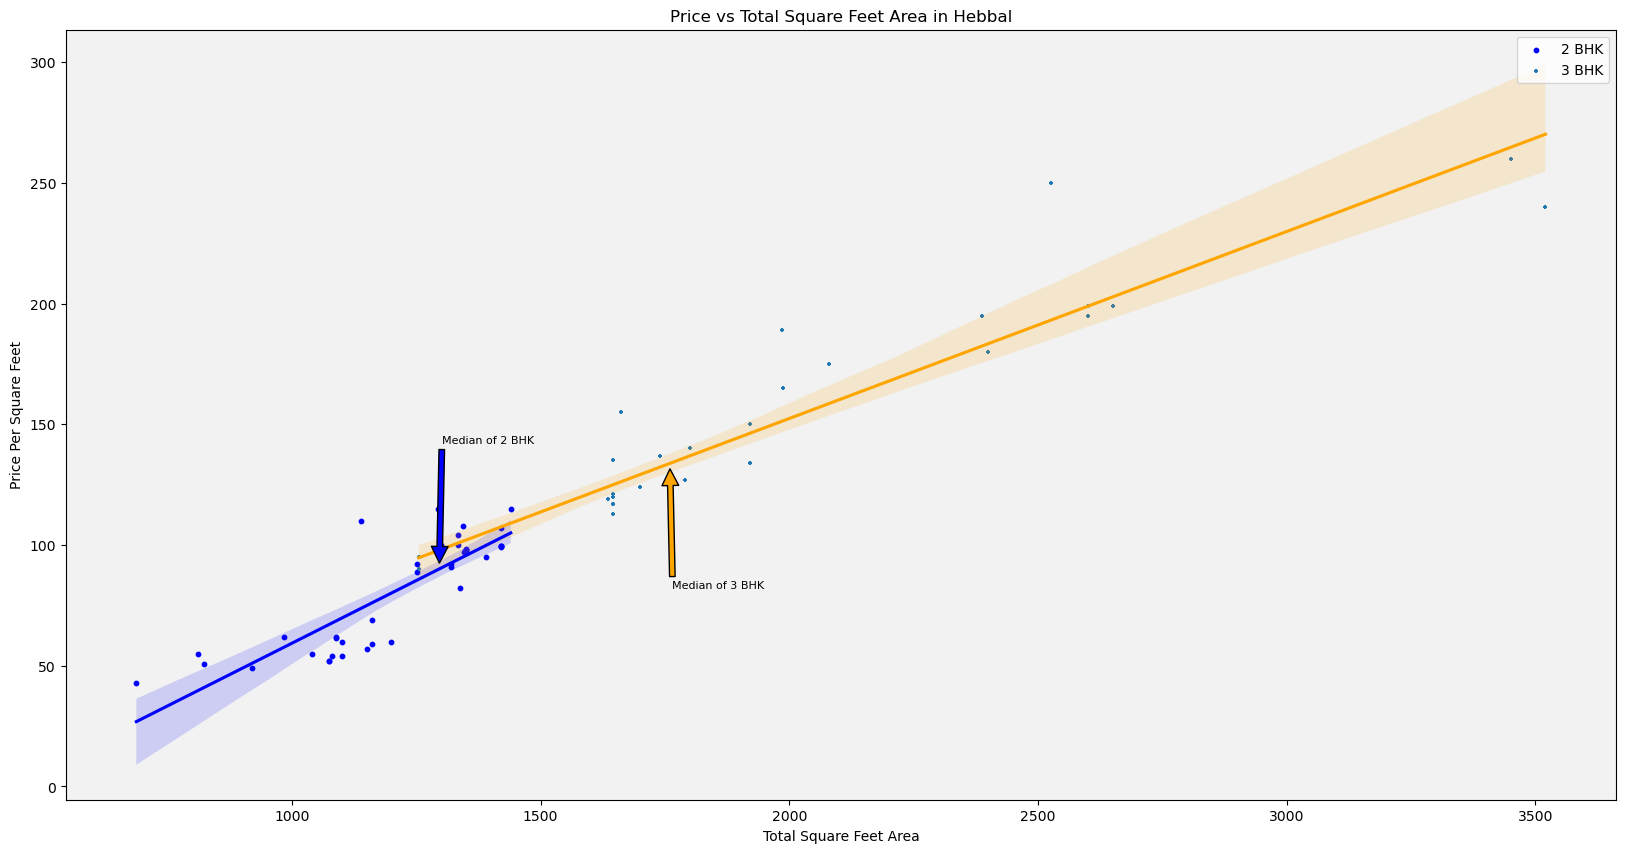

<Figure size 2000x1000 with 0 Axes>

In [46]:
plot_scatter_chart2(data_clean, 'Hebbal')

**this scatter plot is more seperate and shows a clear price difference in total sqft and BHK**


Text(0, 0.5, 'Count')

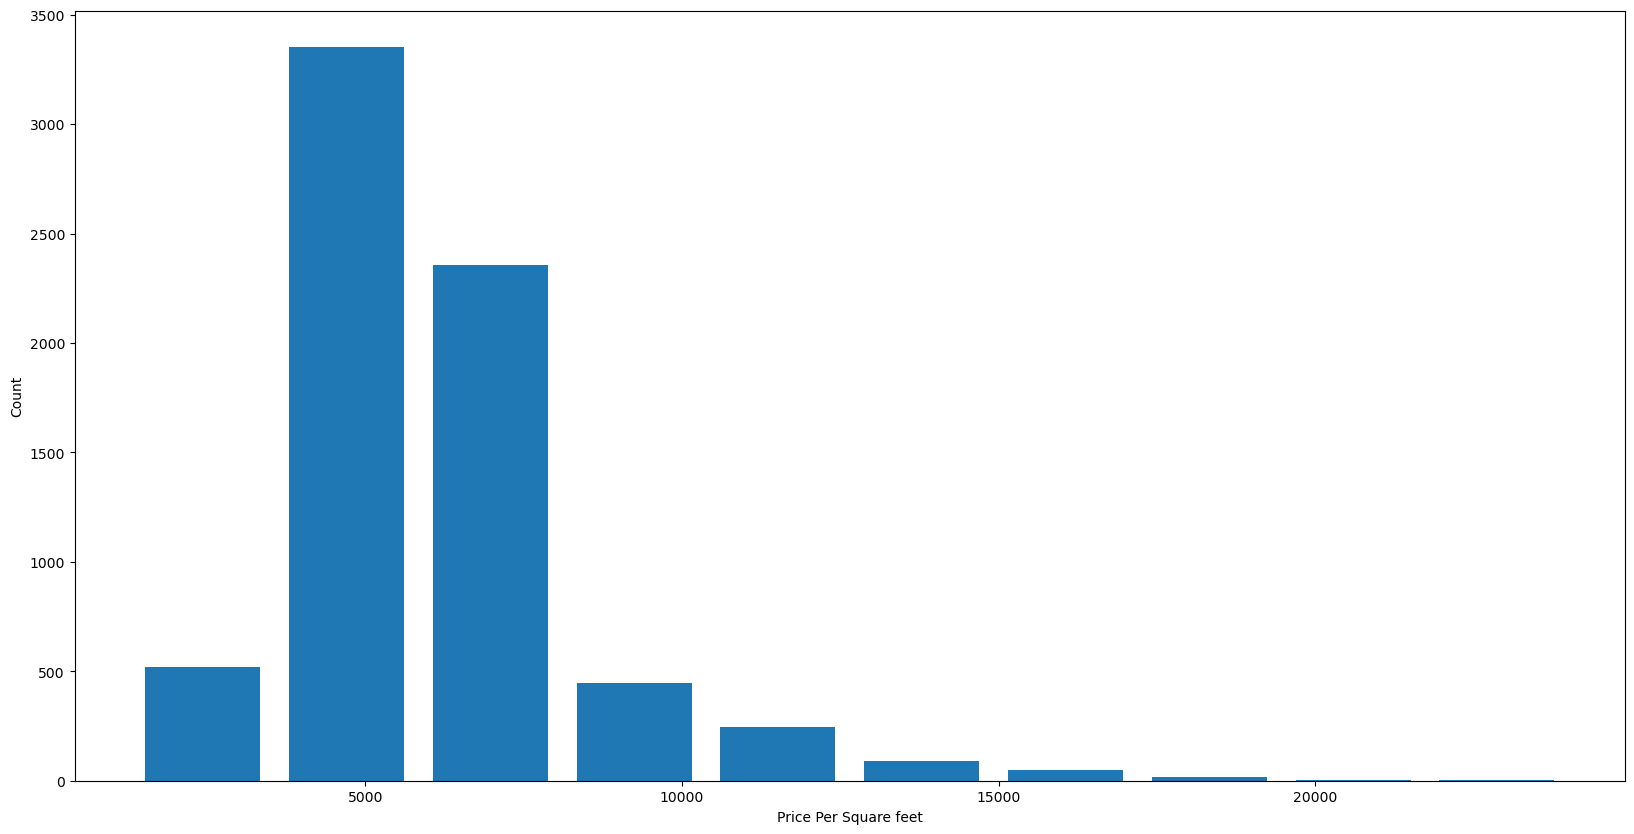

In [47]:
plt.hist(data_clean.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

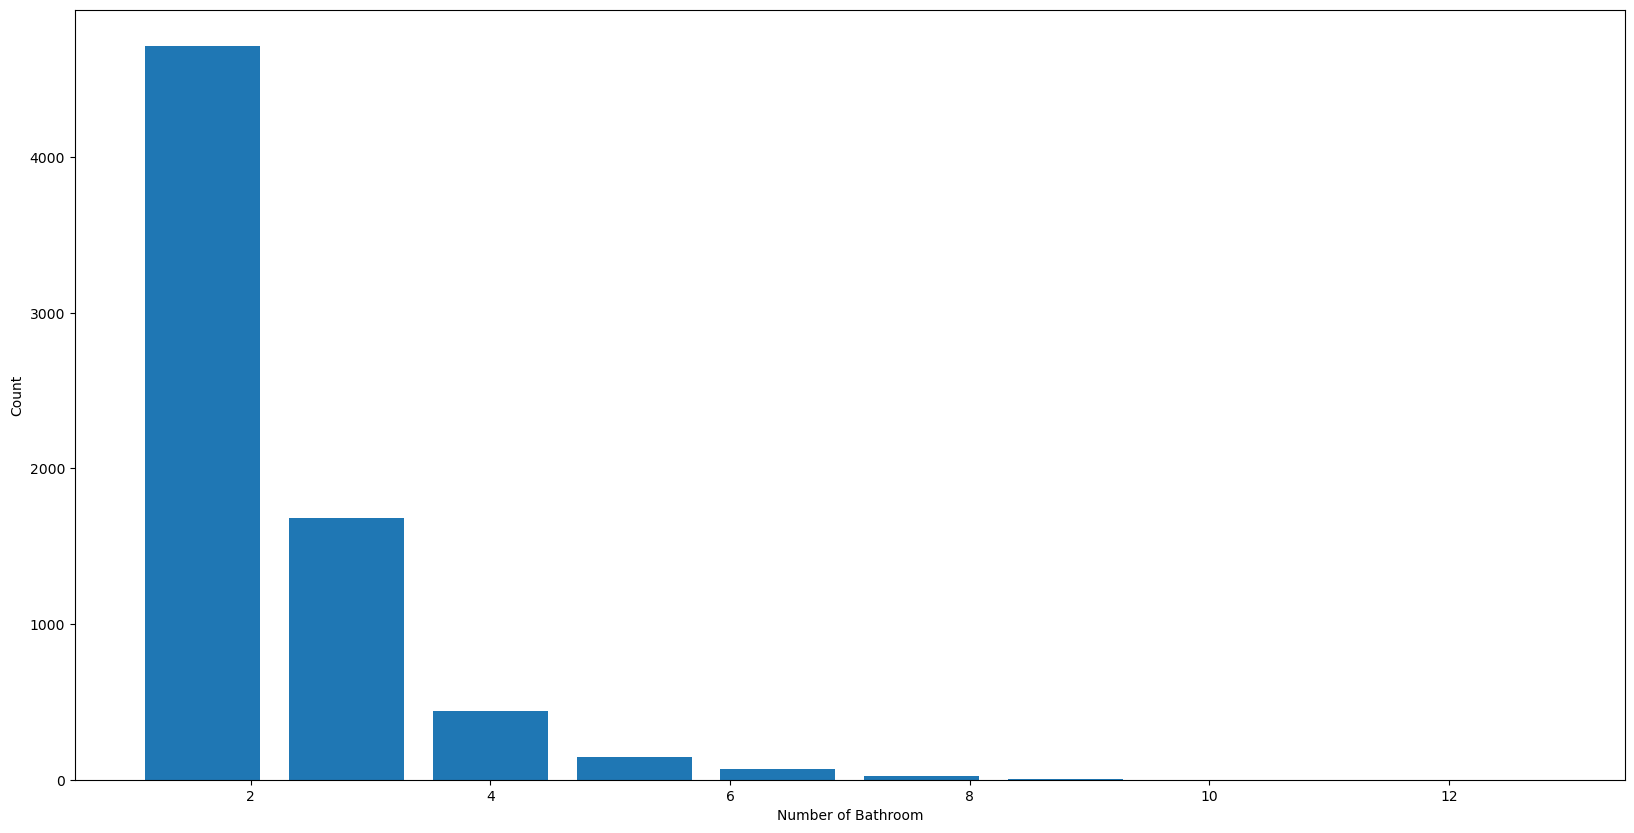

In [48]:
plt.hist(data_clean.bath, rwidth=0.8)
plt.xlabel('Number of Bathroom')
plt.ylabel('Count')

In [49]:
data_clean['bath'].unique()

array([ 4.,  3.,  2.,  1.,  8.,  5.,  6.,  7.,  9., 13.])

In [50]:
data_clean[data_clean['bath'] > 10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,bath_per_bhk,size_category,rooms_total
9355,other,5425.0,13.0,0.0,275.0,13,5069.124424,1.0,Large,26.0


In [51]:
data_clean[data_clean['bath']>data_clean['bhk']+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,bath_per_bhk,size_category,rooms_total
1555,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520,1.75,Large,11.0
6518,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330,2.00,Medium,9.0
8174,other,11338.0,9.0,1.0,1000.0,6,8819.897689,1.50,Large,15.0


The logic behind this conditionis to identify and filter out properties that have an unusually high number of bathrooms compared to the number of bedrooms.

Typically, the number of bathrooms in a home is close to or slightly less than the number of bedrooms.

For example, a 2-bedroom home often has 1 or 2 bathrooms, while a 3-bedroom home might have 2 or 3 bathrooms.

If a property has more than 2 additional bathrooms compared to the number of bedrooms (e.g., a 2-bedroom home with 5 bathrooms), it is considered out of the ordinary or impractical for most buyers.

Such configurations may be due to data entry errors or represent a very niche property type that doesn't align with standard housing trends.
These unusual properties are likely outliers that can distort analysis or predictive models.

In [52]:
data_new =data_clean[data_clean['bath']<data_clean['bhk']+2]
data_new.shape

(7011, 10)

Correlation Analysis
---

In [53]:
data_new.corr(numeric_only = True)

,total_sqft,bath,balcony,price,bhk,price_per_sqft,bath_per_bhk,rooms_total
total_sqft,1.000000,0.739500,0.284628,0.826265,0.718068,0.380818,0.075778,0.750608
bath,0.739500,1.000000,0.292872,0.605926,0.886232,0.344811,0.281684,0.972053
balcony,0.284628,0.292872,1.000000,0.217111,0.272860,0.087515,0.041367,0.291431
price,0.826265,0.605926,0.217111,1.000000,0.580171,0.743430,0.082451,0.610875
bhk,0.718068,0.886232,0.272860,0.580171,1.000000,0.333544,-0.161631,0.970216
price_per_sqft,0.380818,0.344811,0.087515,0.743430,0.333544,1.000000,0.049550,0.349345
bath_per_bhk,0.075778,0.281684,0.041367,0.082451,-0.161631,0.049550,1.000000,0.065388
rooms_total,0.750608,0.972053,0.291431,0.610875,0.970216,0.349345,0.065388,1.000000


<Axes: >

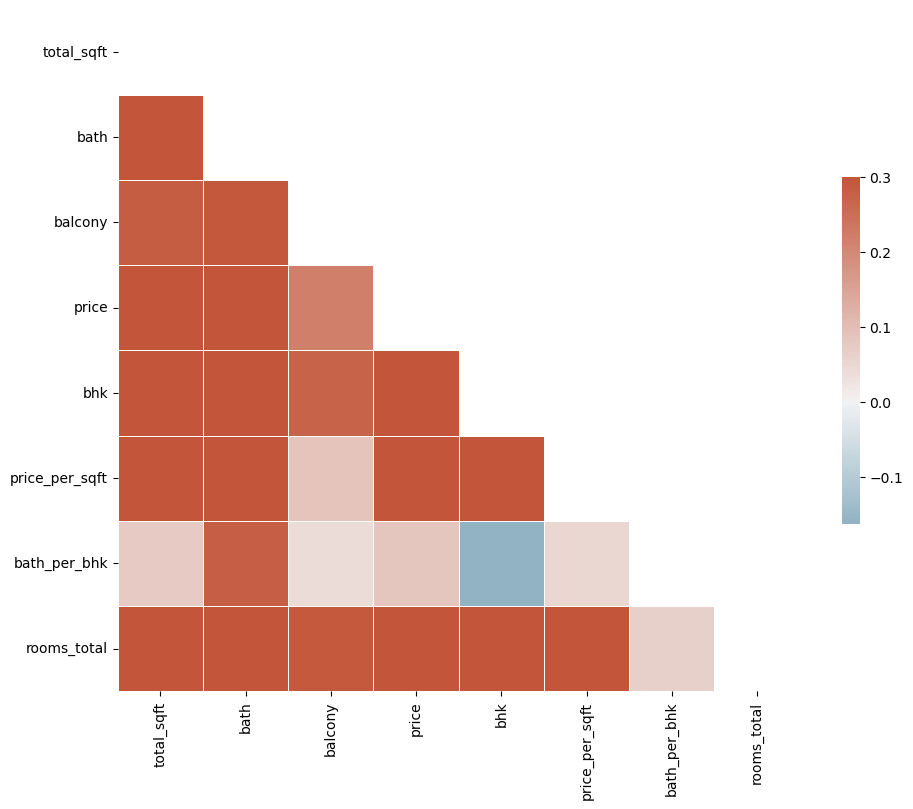

In [54]:
corr = data_new.corr(numeric_only = True)

mask= np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20,  as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={'shrink':.5})

<Axes: >

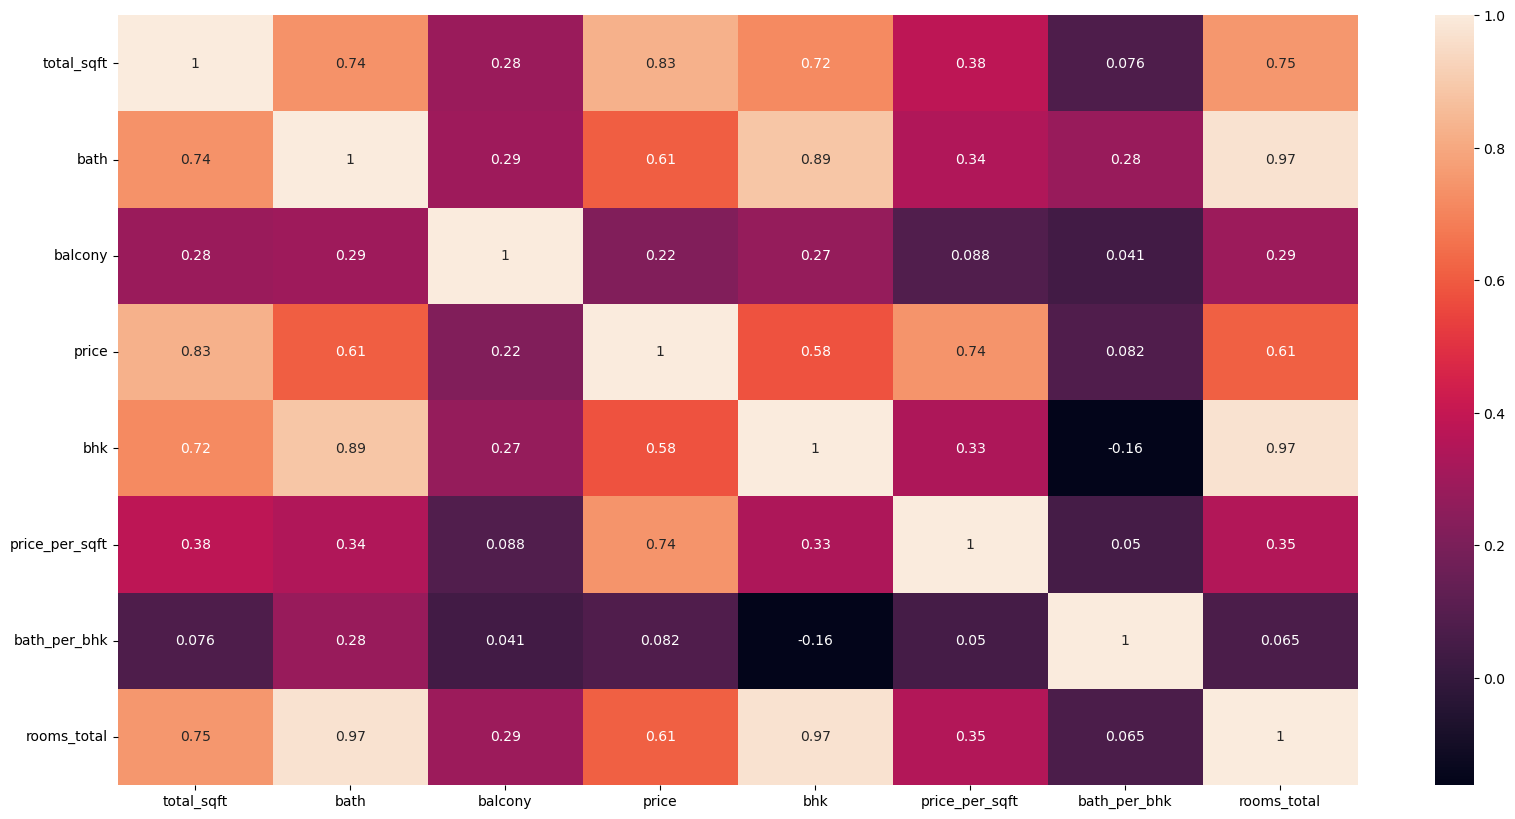

In [55]:
sns.heatmap(data_new.corr(numeric_only=True), annot=True,)

**Analysis:**

**bath and rooms_total**

Correlation = 0.972 (very high correlation).
rooms_total is essentially a combination of bhk and bath (rooms_total = bhk + bath). Keeping both is redundant.

Action: Drop rooms_total since it's derived.

**bhk and rooms_total:**

Correlation = 0.970 (very high correlation).
As above, rooms_total overlaps heavily with bhk. It's less informative than keeping the individual components (bhk and bath).
ay still add value by indicating the relative number of bathrooms per bedroom and can be retained unless shown to harm model performance.

**price_per_sqft:**

Correlation with price = 0.743 (high correlation).
However, this column represents a different perspective on price (price per unit area), so it provides unique information and should be retained.

**balcony:**

Correlation with all other columns is very low (max = 0.292 with bath).
This column has little impact on relationships and should only be dropped .

**bath_per_bhk:**

Correlation with bath: 0.282 (weak correlation).
Correlation with bhk: -0.162 (weak negative correlation).
Correlation with other features is also weak.

Correlation with price is very low (0.082), suggesting that it might not be a significant determinant of house prices and should be dropped

In [56]:
data_clean.drop(['balcony', 'rooms_total' ], axis=1, inplace=True)

In [57]:
data_clean.head()

,location,total_sqft,bath,price,bhk,price_per_sqft,bath_per_bhk,size_category
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860,1.000000,Large
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491,1.000000,Medium
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333,0.666667,Medium
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333,0.666667,Medium
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668,1.000000,Medium


Encode categorical variables
---

In [58]:
from sklearn.preprocessing import OneHotEncoder
one_encode = OneHotEncoder(sparse_output=False) 
loc_encode = one_encode.fit_transform(data_clean[['location']])
loc_coded = pd.DataFrame(loc_encode, 
                         columns=one_encode.get_feature_names_out(['location']), 
                         index=data_clean.index)  # Ensure the index matches the original DataFrame
data_code = pd.concat([data_clean, loc_coded], axis=1)
data_code = data_code.drop(columns=['location'], axis=1)

data_code.head()

,total_sqft,bath,price,bhk,price_per_sqft,bath_per_bhk,size_category,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4,15017.543860,1.000000,Large,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1630.0,3.0,194.0,3,11901.840491,1.000000,Medium,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1875.0,2.0,235.0,3,12533.333333,0.666667,Medium,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1200.0,2.0,130.0,3,10833.333333,0.666667,Medium,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1235.0,2.0,148.0,2,11983.805668,1.000000,Medium,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
data_code.head(10)

,total_sqft,bath,price,bhk,price_per_sqft,bath_per_bhk,size_category,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4,15017.543860,1.000000,Large,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1630.0,3.0,194.0,3,11901.840491,1.000000,Medium,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1875.0,2.0,235.0,3,12533.333333,0.666667,Medium,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1200.0,2.0,130.0,3,10833.333333,0.666667,Medium,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1235.0,2.0,148.0,2,11983.805668,1.000000,Medium,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2750.0,4.0,413.0,4,15018.181818,1.000000,Large,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2450.0,4.0,368.0,4,15020.408163,1.000000,Large,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1875.0,3.0,167.0,3,8906.666667,1.000000,Medium,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2065.0,4.0,210.0,3,10169.491525,1.333333,Large,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2059.0,3.0,225.0,3,10927.634774,1.000000,Large,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
from sklearn.preprocessing import OrdinalEncoder
categories = [['Small', 'Medium', 'Large']]
ordinal_encoder = OrdinalEncoder(categories=categories)
data_code['size_category_encoded'] = ordinal_encoder.fit_transform(data_code[['size_category']])
data_code = data_code.drop('size_category', axis = 1)
data_code.head()

,total_sqft,bath,price,bhk,price_per_sqft,bath_per_bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,size_category_encoded
0,2850.0,4.0,428.0,4,15017.543860,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1630.0,3.0,194.0,3,11901.840491,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1875.0,2.0,235.0,3,12533.333333,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1200.0,2.0,130.0,3,10833.333333,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1235.0,2.0,148.0,2,11983.805668,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**Creating a copy of the data for model traning with algorithms which Scaling is not recommended**

In [61]:
data_mod = data_code.copy()
data_mod.head()

,total_sqft,bath,price,bhk,price_per_sqft,bath_per_bhk,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,...,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,size_category_encoded
0,2850.0,4.0,428.0,4,15017.543860,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1630.0,3.0,194.0,3,11901.840491,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1875.0,2.0,235.0,3,12533.333333,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1200.0,2.0,130.0,3,10833.333333,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1235.0,2.0,148.0,2,11983.805668,1.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Scaling numeric Features
---

In [62]:
from sklearn.preprocessing import StandardScaler
numeric_columns = ['total_sqft', 'price_per_sqft','bath', 'bhk', 'bath_per_bhk']
scaler = StandardScaler()
data_code[numeric_columns] = scaler.fit_transform(data_code[numeric_columns])
print(data_code.head())

   total_sqft      bath  price       bhk  price_per_sqft  bath_per_bhk  \
0    1.898800  1.671940  428.0  1.769408        3.853181      0.094144   
1    0.240127  0.621227  194.0  0.619999        2.513939      0.094144   
2    0.573221 -0.429486  235.0  0.619999        2.785378     -1.952701   
3   -0.344487 -0.429486  130.0  0.619999        2.054656     -1.952701   
4   -0.296902 -0.429486  148.0 -0.529410        2.549171      0.094144   

   location_1st Block Jayanagar  location_1st Phase JP Nagar  \
0                           1.0                          0.0   
1                           1.0                          0.0   
2                           1.0                          0.0   
3                           1.0                          0.0   
4                           1.0                          0.0   

   location_2nd Phase Judicial Layout  location_2nd Stage Nagarbhavi  ...  \
0                                 0.0                            0.0  ...   
1               

**Training a Model ⛩️**
---

Linear Regression
---

In [63]:
X = data_code.drop(columns=['price'])  # Replace 'price' with your actual target column name
y = data_code['price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [65]:
lr_clf=  LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

0.8655774245109379

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.91497309, 0.93220893, 0.86621707, 0.94302184, 0.92841946])

In [67]:
original_values = y_test[:5]

predicted_values = lr_clf.predict(X_test[:5])
comparison_dataFrame = pd.DataFrame(data={'Original values':original_values, 'Predicted values':predicted_values})
comparison_dataFrame['Diffrences'] = comparison_dataFrame['Original values'] - comparison_dataFrame['Predicted values']

In [68]:
comparison_dataFrame

,Original values,Predicted values,Diffrences
3474,160.0,168.107530,-8.107530
7416,110.0,108.609967,1.390033
519,17.0,13.601102,3.398898
2533,44.0,28.778040,15.221960
1210,50.0,49.554621,0.445379


In [69]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7.888259287049292

In [70]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

5.712760096143441

Xgboost, Decision Tree and Random Forest
---

In [72]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = data_mod.drop(columns=['price']) 
y = data_mod['price']  

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
xgb_model = XGBRegressor(random_state=42, n_estimators=100)

# Train models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Training R2 Score: {r2_score(y_train, y_train_pred):.2f}")
    print(f"Test R2 Score: {r2_score(y_test, y_test_pred):.2f}")
    print(f"Test RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.2f}\n")

evaluate_model(dt_model, X_train, X_test, y_train, y_test)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)
evaluate_model(xgb_model, X_train, X_test, y_train, y_test)


Model: DecisionTreeRegressor
Training R2 Score: 1.00
Test R2 Score: 0.99
Test RMSE: 7.68

Model: RandomForestRegressor
Training R2 Score: 0.99
Test R2 Score: 1.00
Test RMSE: 3.74

Model: XGBRegressor
Training R2 Score: 1.00
Test R2 Score: 0.99
Test RMSE: 6.39



**Random Forest seems to be the best performing model out of the rest**

Fine Tuning the Model (Optional)
---

After picking the best performing model **(RandomForest)** i will need to fine tune the hyperparameters(parameters of the model that are not affected by training) in other to find the best ones that fit the model. Hence GridSearch can accomplish this

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    #try 12(3x4) combinations of hyperparameters
    {'n_estimators': [x for x in range(3,31)], 'max_features':[x for x in range(2,9)]},
    
    #try 6(2x3) combinations with boostrap set as false
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2,3,4]},
]

rf_model = RandomForestRegressor(random_state=42)
#train across 5folds, thats a total of (12+6)x5=90 rounds of training
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3, 4, 5, 6, 7, 8],
                          'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                           14, 15, 16, 17, 18, 19, 20, 21, 22,
                                           23, 24, 25, 26, 27, 28, 29, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [74]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 12}

In [75]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=12, random_state=42)

In [76]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_mse =mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

15.907613529175604

Conclusion / Feature Importance
---

In [77]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([2.67623126e-01, 1.07394583e-01, 9.53730563e-02, 2.04141746e-01,
       2.72207858e-02, 2.23592124e-03, 3.10275339e-04, 6.18879871e-05,
       1.87397874e-03, 6.83459925e-05, 6.15419839e-05, 3.48339799e-04,
       7.42420632e-04, 2.00458426e-05, 2.89669983e-06, 4.64786334e-04,
       1.21677955e-04, 5.90284476e-05, 3.22951421e-04, 3.89010582e-05,
       9.97605348e-05, 3.74611012e-04, 5.63304090e-04, 1.63849223e-04,
       8.38516726e-05, 3.50362300e-05, 7.75929354e-04, 3.21096412e-05,
       1.28252989e-03, 6.83115406e-06, 8.93852498e-05, 3.52160295e-05,
       4.77767790e-05, 1.53986466e-04, 1.24567629e-03, 8.80063107e-05,
       3.16329775e-04, 4.27137098e-04, 6.30535084e-06, 1.53003838e-04,
       1.34378434e-04, 2.73717581e-04, 3.00483169e-04, 1.34756784e-03,
       1.56590219e-04, 1.22991141e-04, 3.95057301e-04, 5.14162658e-05,
       3.76714418e-03, 1.29865159e-05, 1.05544932e-04, 9.20208865e-05,
       2.96333255e-04, 3.64991418e-04, 2.40828625e-04, 2.95072898e-04,
      

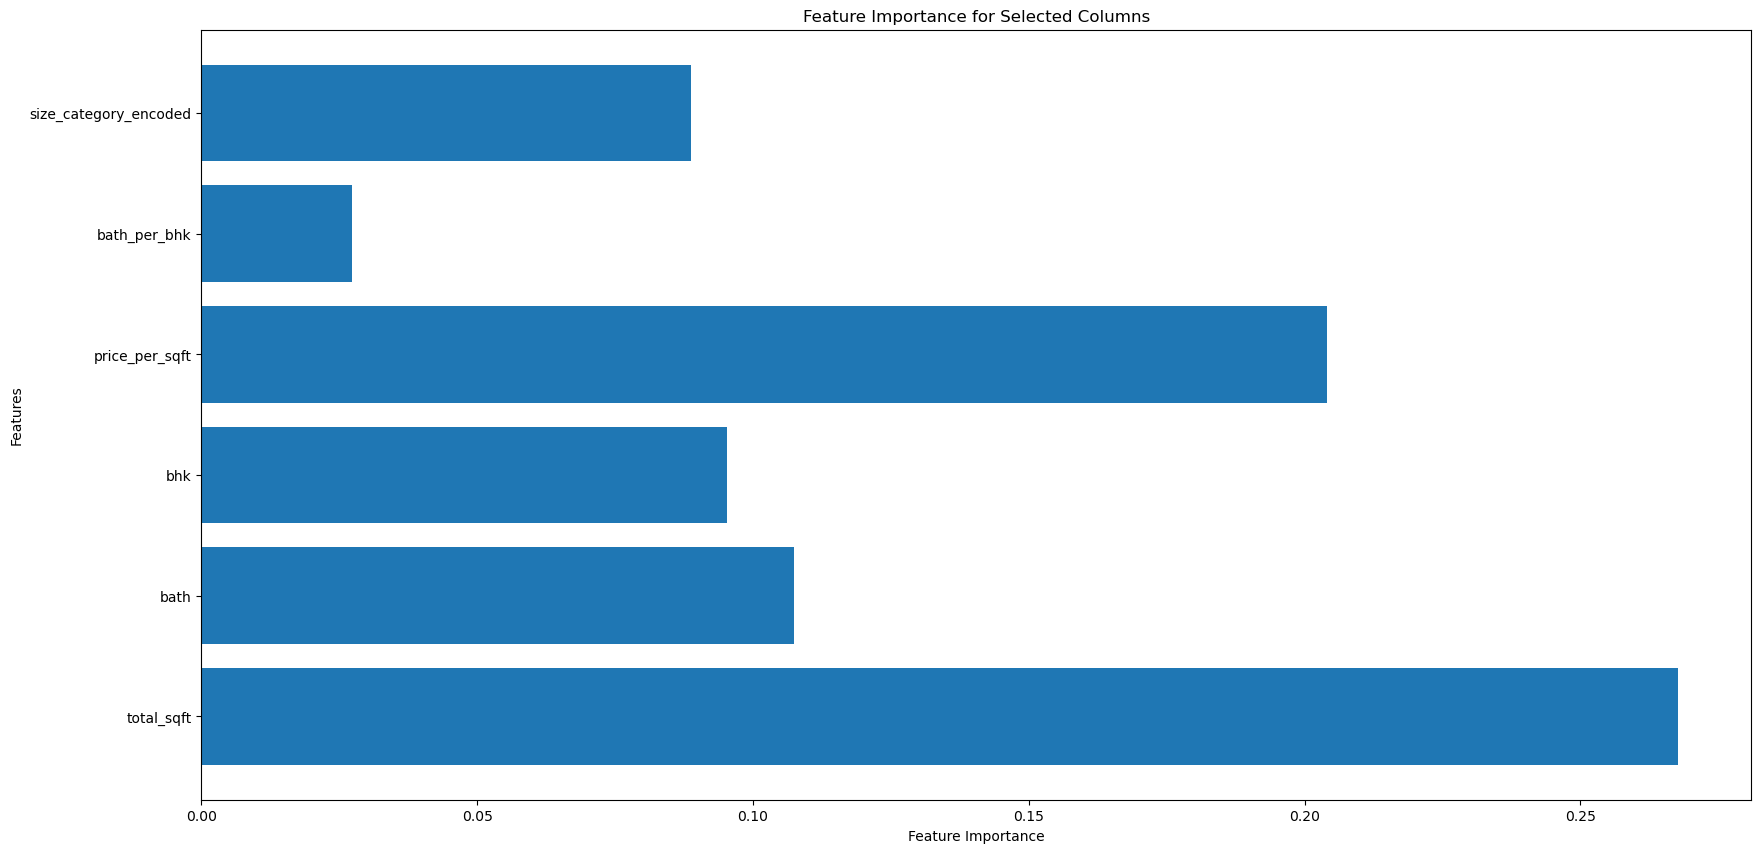

In [84]:

selected_columns = ['total_sqft', 'bath', 'bhk', 'price_per_sqft', 'bath_per_bhk', 'size_category_encoded']
selected_indices = [X_train.columns.get_loc(col) for col in selected_columns]
selected_feature_importance = feature_importance[selected_indices]
plt.barh(y=selected_columns, width=selected_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Selected Columns')
plt.show()

**The best model for prediction is RandomForest**

**The most important feature is total_square_feet**

**More details and research can be provided on Bengalaru India and the different location factors as supported by the data**

**More data can be added to this model to make it more robust**